In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
covid_19_india=pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
individual_details=pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
population_india=pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
icmr_test=pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
hospital_beds=pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')


In [3]:
population_india.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [4]:
population_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sno                      36 non-null     int64 
 1   State / Union Territory  36 non-null     object
 2   Population               36 non-null     int64 
 3   Rural population         36 non-null     int64 
 4   Urban population         36 non-null     int64 
 5   Area                     36 non-null     object
 6   Density                  36 non-null     object
 7   Gender Ratio             36 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ KB


In [5]:
hospital_beds=hospital_beds[:-2]
hospital_beds.fillna(0,inplace=True)
hospital_beds

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,0.0,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [7]:
hospital_beds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [8]:
hospital_beds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               35 non-null     int64  
 1   State/UT                          35 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      35 non-null     object 
 3   NumCommunityHealthCenters_HMIS    35 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      35 non-null     float64
 5   NumDistrictHospitals_HMIS         35 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  35 non-null     int64  
 7   NumPublicBeds_HMIS                35 non-null     int64  
 8   NumRuralHospitals_NHP18           35 non-null     int64  
 9   NumRuralBeds_NHP18                35 non-null     int64  
 10  NumUrbanHospitals_NHP18           35 non-null     int64  
 11  NumUrbanBeds_NHP18                35 non-null     int64  
dtypes: float64

In [9]:
for col in hospital_beds.columns[2:]:
    if hospital_beds[col].dtype=='object':
        hospital_beds[col]=hospital_beds[col].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
covid_19_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4671 entries, 0 to 4670
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       4671 non-null   int64 
 1   Date                      4671 non-null   object
 2   Time                      4671 non-null   object
 3   State/UnionTerritory      4671 non-null   object
 4   ConfirmedIndianNational   4671 non-null   object
 5   ConfirmedForeignNational  4671 non-null   object
 6   Cured                     4671 non-null   int64 
 7   Deaths                    4671 non-null   int64 
 8   Confirmed                 4671 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 328.6+ KB


In [11]:
covid_19_india['Date']=pd.to_datetime(covid_19_india['Date'])
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [12]:
individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


# **visualization**

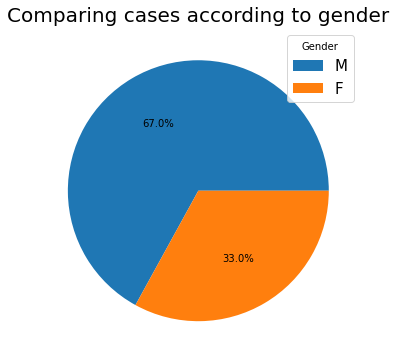

In [13]:
from collections import Counter
gender=individual_details.gender
gender.dropna(inplace=True)
gender=gender.value_counts()
per=[]
for i in gender:
    perc=i/gender.sum()
    per.append(format(perc,'.2f'))
plt.figure(figsize=(10,6))    
plt.title('Comparing cases according to gender',fontsize=20)
plt.pie(per,autopct='%1.1f%%')
plt.legend(gender.index,loc='best',title='Gender',fontsize=15)

In [17]:
icmr_test.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


<BarContainer object of 10 artists>

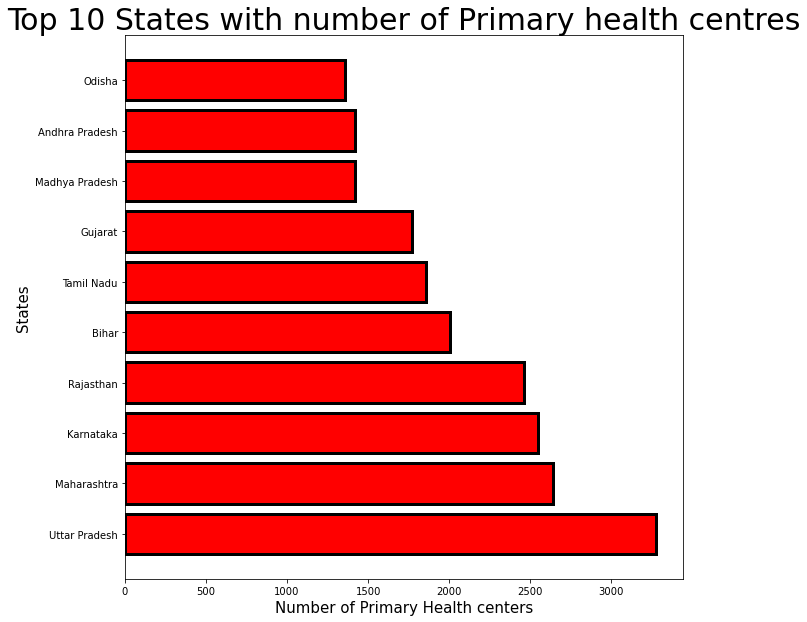

In [19]:
top_10=hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')

plt.figure(figsize=(10,10))
plt.title('Top 10 States with number of Primary health centres',fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Primary Health centers',fontsize=15)
plt.ylabel('States',fontsize=15)
plt.barh(top_10['State/UT'],top_10['NumPrimaryHealthCenters_HMIS'],color='red',edgecolor='black',linewidth=3)

<BarContainer object of 10 artists>

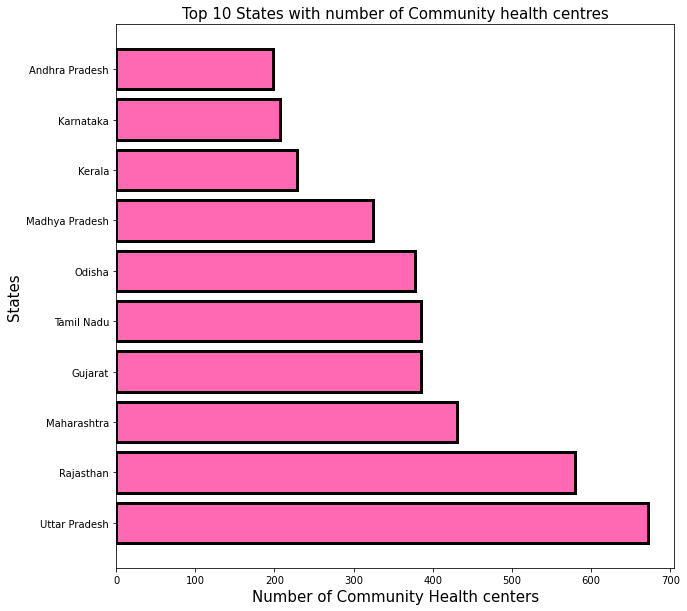

In [20]:
top_10=hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')

plt.figure(figsize=(10,10))
plt.title('Top 10 States with number of Community health centres',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Community Health centers',fontsize=15)
plt.ylabel('States',fontsize=15)
plt.barh(top_10['State/UT'],top_10['NumCommunityHealthCenters_HMIS'],color='hotpink',edgecolor='black',linewidth=3)

<BarContainer object of 10 artists>

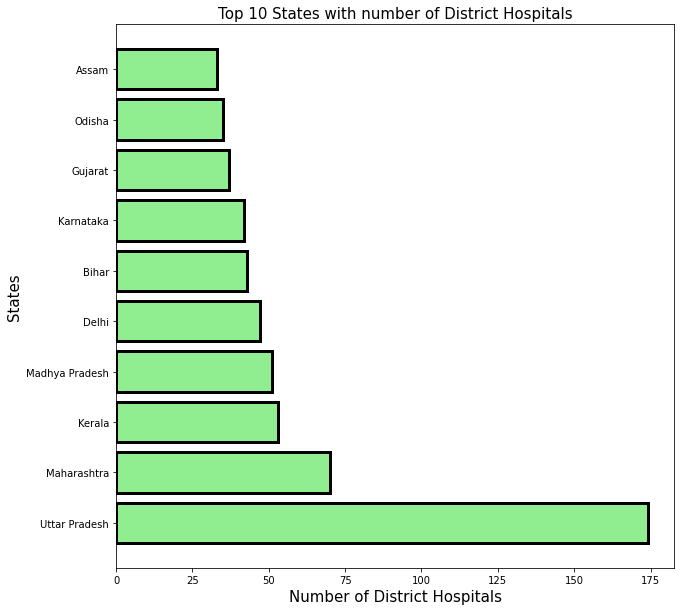

In [21]:
top_10=hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')

plt.figure(figsize=(10,10))
plt.title('Top 10 States with number of District Hospitals',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of District Hospitals',fontsize=15)
plt.ylabel('States',fontsize=15)
plt.barh(top_10['State/UT'],top_10['NumDistrictHospitals_HMIS'],color='lightgreen',edgecolor='black',linewidth=3)

<BarContainer object of 10 artists>

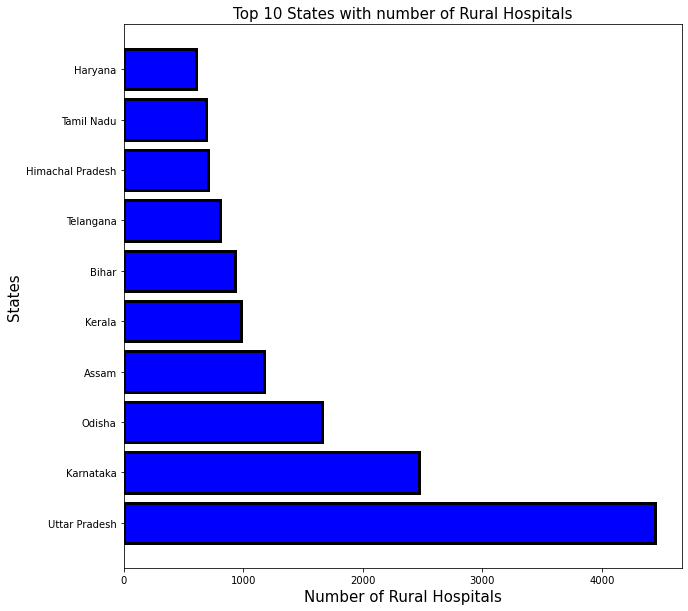

In [22]:
top_10=hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')

plt.figure(figsize=(10,10))
plt.title('Top 10 States with number of Rural Hospitals',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Rural Hospitals',fontsize=15)
plt.ylabel('States',fontsize=15)
plt.barh(top_10['State/UT'],top_10['NumRuralHospitals_NHP18'],color='blue',edgecolor='black',linewidth=3)

<BarContainer object of 10 artists>

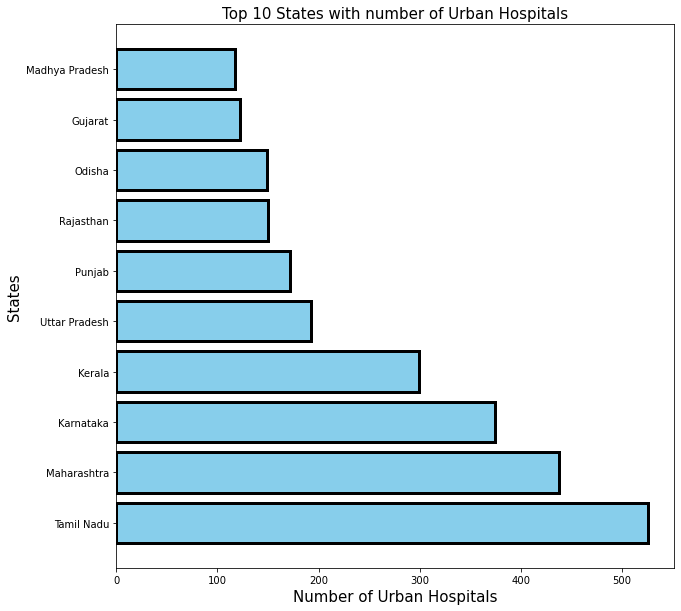

In [23]:
top_10=hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')

plt.figure(figsize=(10,10))
plt.title('Top 10 States with number of Urban Hospitals',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Urban Hospitals',fontsize=15)
plt.ylabel('States',fontsize=15)
plt.barh(top_10['State/UT'],top_10['NumUrbanHospitals_NHP18'],color='skyblue',edgecolor='black',linewidth=3)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

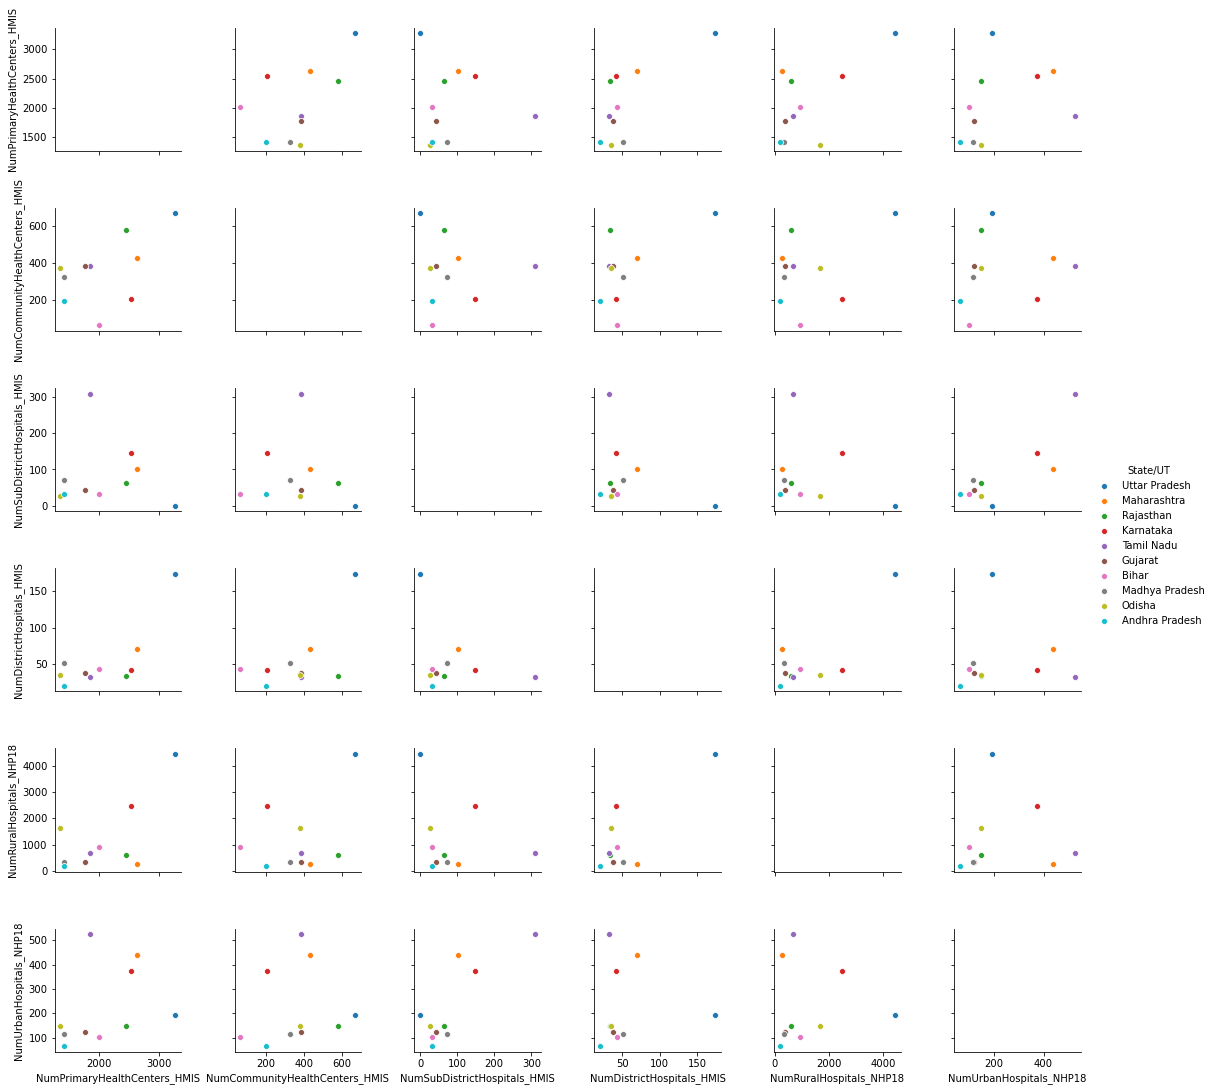

In [24]:
top_10=hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10=top_10[['State/UT','NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS'      
                    ,'NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS'                 
                    ,'NumRuralHospitals_NHP18' ,'NumUrbanHospitals_NHP18']]
sns.pairplot(top_10,hue='State/UT')

In [27]:
df1=covid_19_india.groupby('Date')[['Cured','Deaths','Confirmed']].sum()
df1.head()

,Cured,Deaths,Confirmed
Date,,,
2020-01-02,0,0,2
2020-01-03,0,0,3
2020-01-04,144,41,1834
2020-01-05,9065,1152,34972
2020-01-06,91819,5394,190535


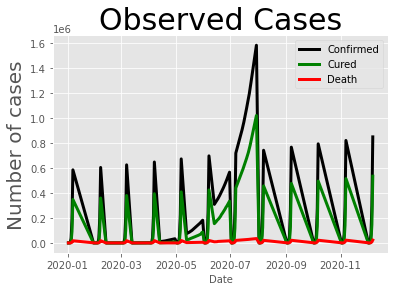

In [30]:
plt.style.use('ggplot')
plt.title('Observed Cases',fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(df1.index,df1['Confirmed'],linewidth=3,label='Confirmed',color='black')
plt.plot(df1.index,df1['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(df1.index,df1['Deaths'],linewidth=3,label='Death',color='red')
plt.legend(fontsize=10)

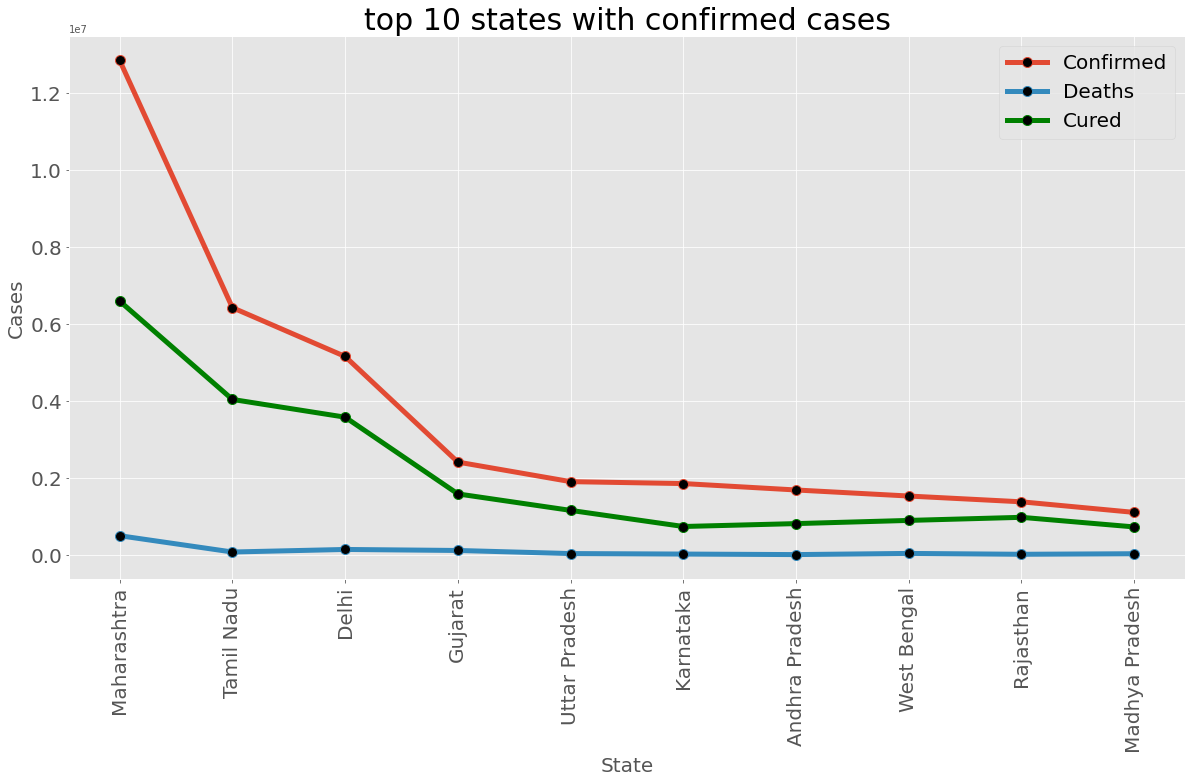

In [32]:
df2=covid_19_india.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()
df2=df2.nlargest(10,'Confirmed')
plt.figure(figsize=(20,10))
plt.title('top 10 states with confirmed cases',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.plot(df2.index,df2.Confirmed,marker='o',mfc='black',label='Confirmed',markersize=10,linewidth=5)
plt.plot(df2.index,df2.Deaths,marker='o',mfc='black',label='Deaths',markersize=10,linewidth=5)
plt.plot(df2.index,df2.Cured,marker='o',mfc='black',label='Cured',markersize=10,linewidth=5,color='green')
plt.legend(fontsize=20)

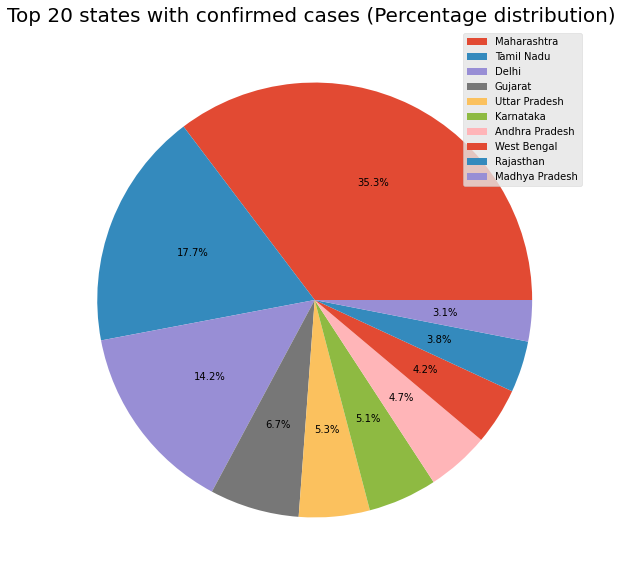

In [33]:
perc=[]
for i in df2.Confirmed:
    per=i/len(df2)
    perc.append(i)
plt.figure(figsize=(25,10))    
plt.title('Top 20 states with confirmed cases (Percentage distribution) ',fontsize=20)
plt.pie(perc,autopct='%1.1f%%')
plt.legend(df2.index,loc='upper right')

In [34]:
covid_19_india['ConfirmedForeignNational'].replace('-',0,inplace=True)
covid_19_india['ConfirmedIndianNational'].replace('-',0,inplace=True)
covid_19_india['ConfirmedIndianNational']=covid_19_india['ConfirmedIndianNational'].astype('int64')
covid_19_india['ConfirmedForeignNational']=covid_19_india['ConfirmedForeignNational'].astype('int64')

In [35]:
df3=covid_19_india.groupby('State/UnionTerritory')[['ConfirmedIndianNational','ConfirmedForeignNational']].sum()
df4=df3.nlargest(20,'ConfirmedIndianNational')
df5=df3.nlargest(20,'ConfirmedForeignNational')

<BarContainer object of 20 artists>

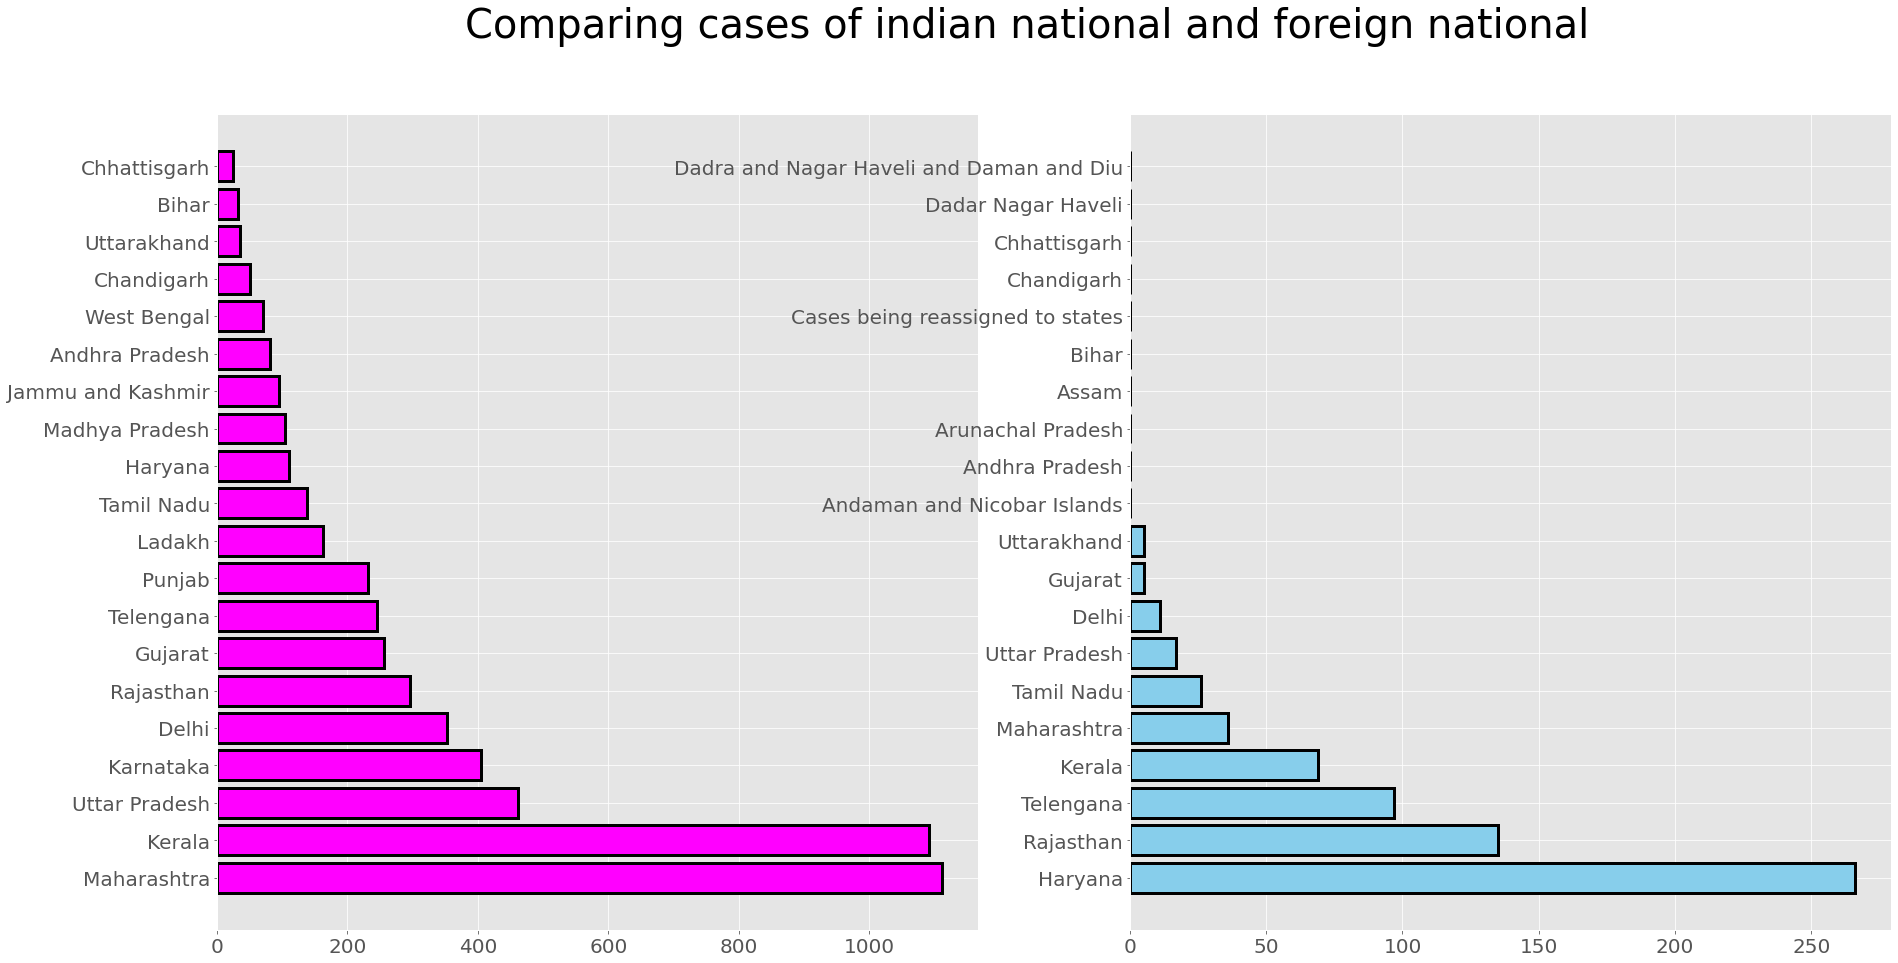

In [36]:
plt.figure(figsize=(30,15))
plt.suptitle('Comparing cases of indian national and foreign national',fontsize=40)
plt.subplot(121)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df4.index,df4.ConfirmedIndianNational,color='magenta',edgecolor='black',linewidth=3)
plt.subplot(122)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df5.index,df5.ConfirmedForeignNational,color='skyblue',edgecolor='black',linewidth=3)

<BarContainer object of 10 artists>

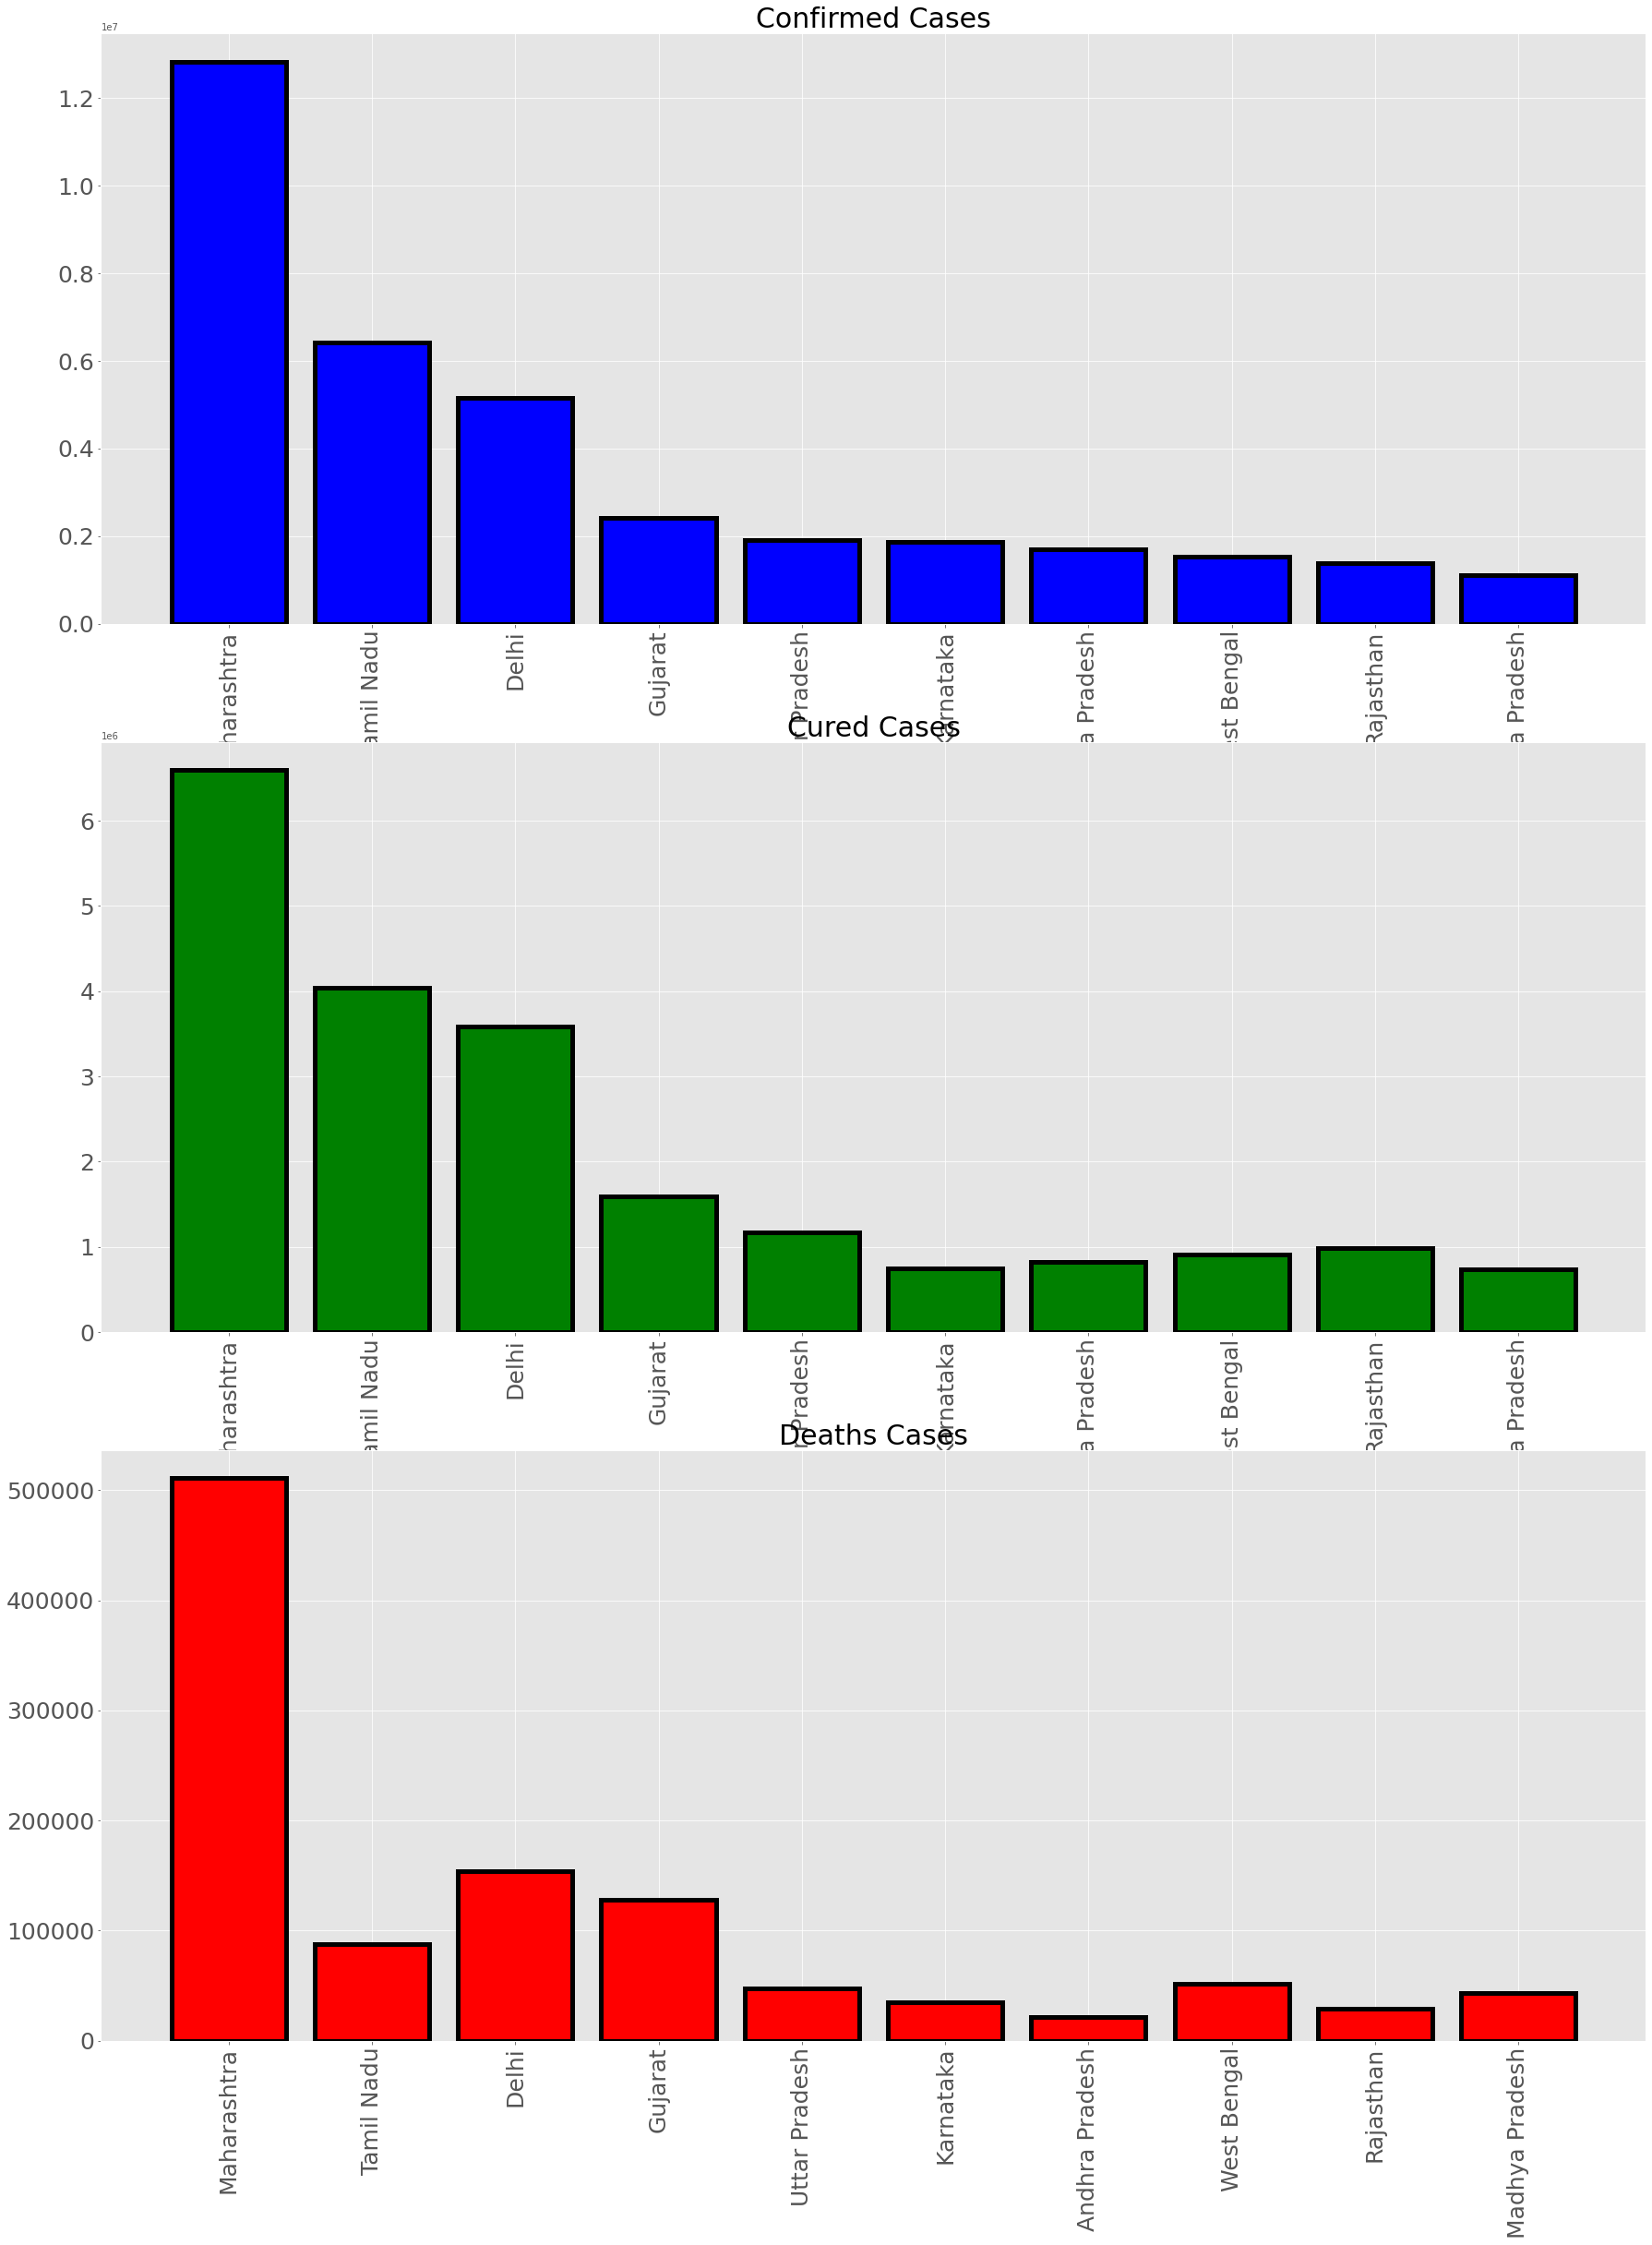

In [37]:
plt.figure(figsize=(30,40))
plt.subplot(311)
plt.title('Confirmed Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Confirmed,color='blue',linewidth=5,edgecolor='black')
plt.subplot(312)
plt.title('Cured Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Cured,color='green',linewidth=5,edgecolor='black')
plt.subplot(313)
plt.title('Deaths Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Deaths,color='red',linewidth=5,edgecolor='black')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

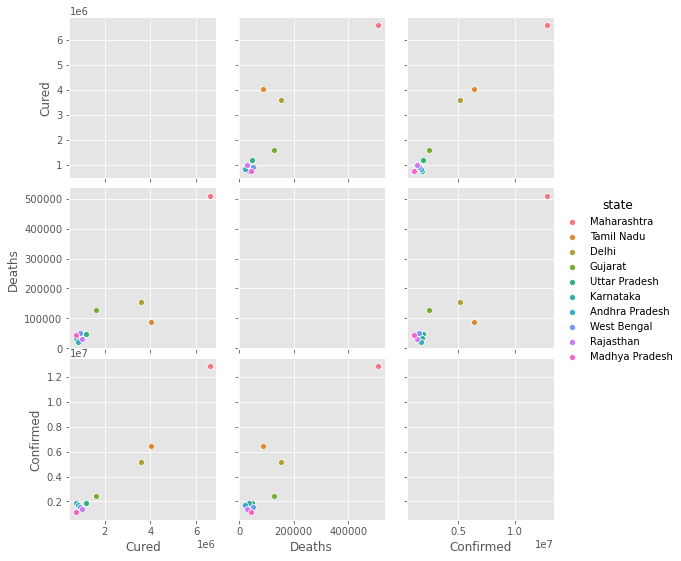

In [38]:
df2=df2.nlargest(10,'Confirmed')
df2['state']=df2.index
sns.pairplot(df2,hue='state')

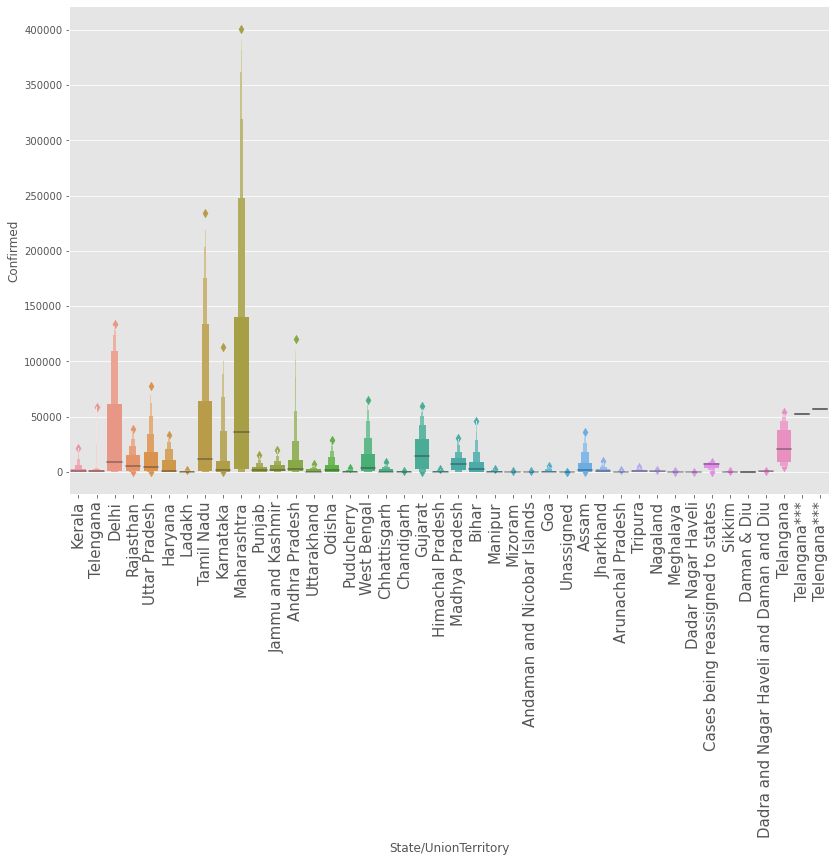

In [39]:
g=sns.catplot(x='State/UnionTerritory',y='Confirmed',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

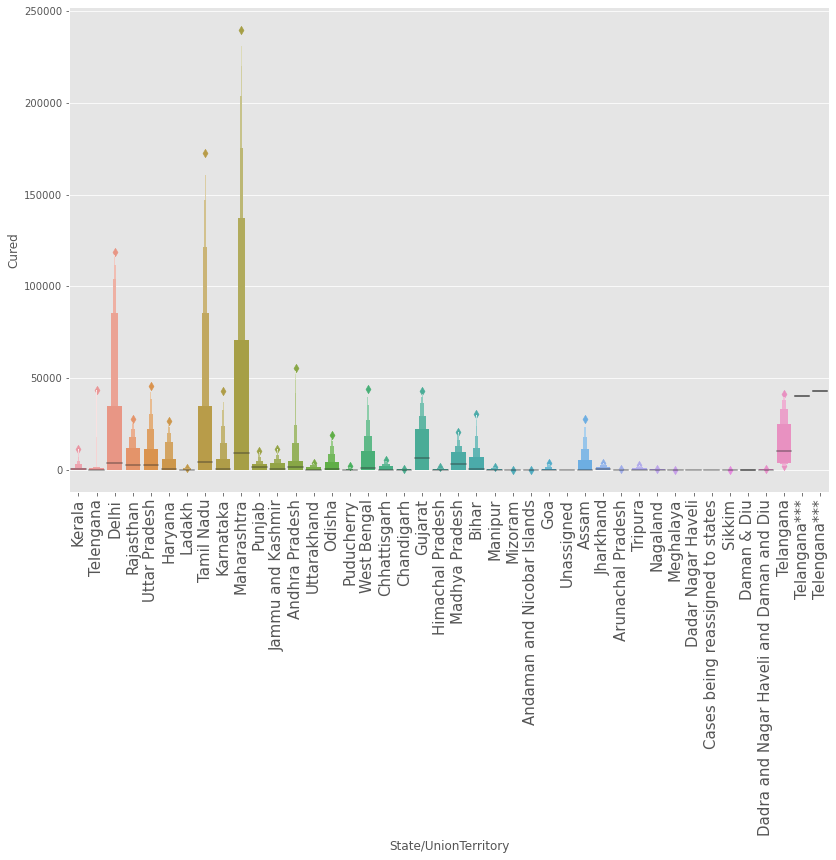

In [40]:
g=sns.catplot(x='State/UnionTerritory',y='Cured',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

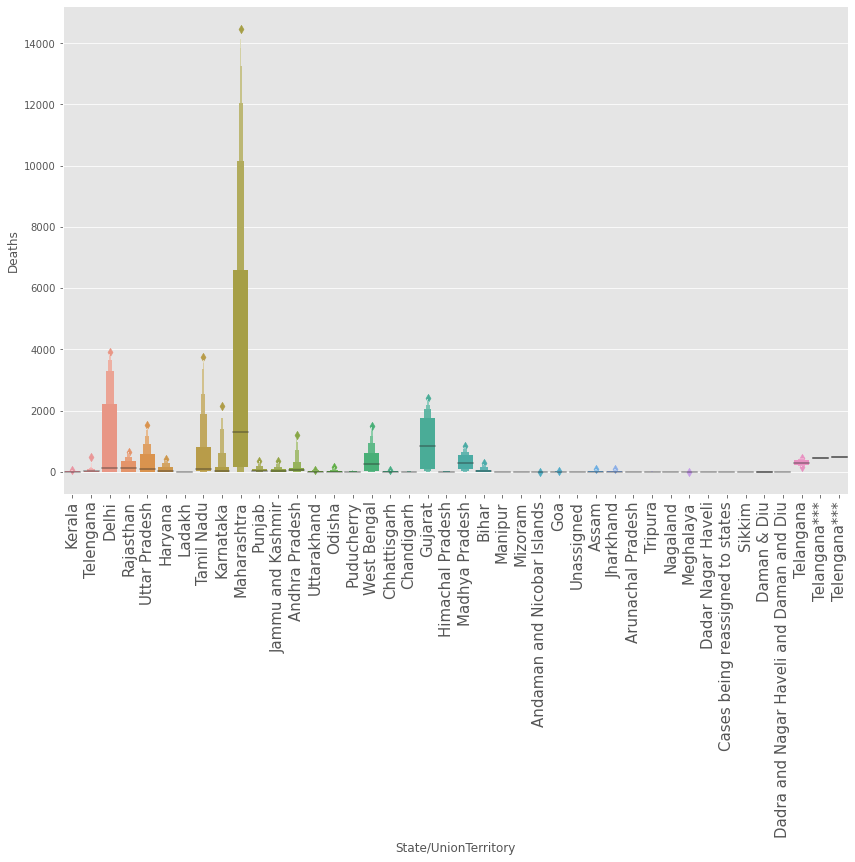

In [41]:
g=sns.catplot(x='State/UnionTerritory',y='Deaths',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

In [43]:
icmr_test.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


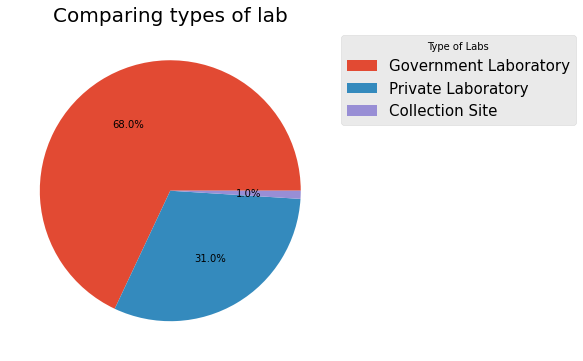

In [48]:
from collections import Counter
type_of_lab=icmr_test.type
type_of_lab.dropna(inplace=True)
type_of_lab=type_of_lab.value_counts()
per=[]
for i in type_of_lab:
    perc=i/type_of_lab.sum()
    per.append(format(perc,'.2f'))
plt.figure(figsize=(10,6))    
plt.title('Comparing types of lab',fontsize=20)
plt.pie(per,autopct='%1.1f%%')
plt.legend(type_of_lab.index,loc='best',title='Type of Labs',fontsize=15,bbox_to_anchor=(1,1))

# **Label Encoding**

In [49]:
lbl=LabelEncoder()
covid_19_india['State/UnionTerritory']=lbl.fit_transform(covid_19_india['State/UnionTerritory'])
covid_19_india['date']=covid_19_india['Date'].dt.day
covid_19_india['month']=covid_19_india['Date'].dt.month

In [50]:
tree=DecisionTreeRegressor()
linear=LinearRegression()
forest=RandomForestClassifier()

## Splitting training and testing data

In [51]:
x=covid_19_india[['State/UnionTerritory','date','month','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=covid_19_india['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
tree.fit(x_train,y_train)
linear.fit(x_train,y_train)
forest.fit(x_train,y_train) #fit models

RandomForestClassifier()

# **Predict**

In [53]:
from sklearn.metrics import r2_score
prediction=tree.predict(x_test)
score1=r2_score(y_test,prediction)

In [56]:
prediction=linear.predict(x_test)
score2=r2_score(y_test,prediction)

In [57]:
prediction=forest.predict(x_test)
score3=r2_score(y_test,prediction)

In [59]:
scores=[score1,score2,score3]
scores

[0.9940851974383762, 0.9806726482756655, 0.9981328730101681]

# Score1 and score3 are 99% accurate i.e. DecisionTree and Random forest respectively.